In [3]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

from urllib.request import urlopen 
import re
def read_url(url): 
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

In [2]:
pip install datascience


[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
2+3

5

In [5]:
# Read two books, fast!

huck_finn_url = 'https://www.inferentialthinking.com/data/huck_finn.txt'
huck_finn_text = read_url(huck_finn_url)
huck_finn_chapters = huck_finn_text.split('CHAPTER ')[44:]

little_women_url = 'https://www.inferentialthinking.com/data/little_women.txt'
little_women_text = read_url(little_women_url)
little_women_chapters = little_women_text.split('CHAPTER ')[1:]

In [6]:
huck_finn_chapters

['I. YOU don\'t know about me without you have read a book by the name of The Adventures of Tom Sawyer; but that ain\'t no matter. That book was made by Mr. Mark Twain, and he told the truth, mainly. There was things which he stretched, but mainly he told the truth. That is nothing. I never seen anybody but lied one time or another, without it was Aunt Polly, or the widow, or maybe Mary. Aunt Polly--Tom\'s Aunt Polly, she is--and Mary, and the Widow Douglas is all told about in that book, which is mostly a true book, with some stretchers, as I said before. Now the way that the book winds up is this: Tom and me found the money that the robbers hid in the cave, and it made us rich. We got six thousand dollars apiece--all gold. It was an awful sight of money when it was piled up. Well, Judge Thatcher he took it and put it out at interest, and it fetched us a dollar a day apiece all the year round--more than a body could tell what to do with. The Widow Douglas she took me for her son, and 

In [7]:
Table().with_column('Chapters', huck_finn_chapters)

Chapters
I. YOU don't know about me without you have read a book ...
II. WE went tiptoeing along a path amongst the trees bac ...
"III. WELL, I got a good going-over in the morning from o ..."
"IV. WELL, three or four months run along, and it was wel ..."
V. I had shut the door to. Then I turned around and ther ...
"VI. WELL, pretty soon the old man was up and around agai ..."
"VII. ""GIT up! What you 'bout?"" I opened my eyes and look ..."
VIII. THE sun was up so high when I waked that I judged ...
IX. I wanted to go and look at a place right about the m ...
X. AFTER breakfast I wanted to talk about the dead man a ...


In [8]:
np.char.count(huck_finn_chapters, 'Tom')

array([ 6, 24,  5,  0,  0,  0,  2,  2,  0,  0,  2,  3,  1,  0,  0,  0,  3,
        5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  4, 19, 15,
       14, 18,  9, 32, 11, 11,  8, 30,  6])

In [9]:
np.char.count(huck_finn_chapters, 'Jim')

array([ 0, 16,  0,  8,  0,  0,  0, 22, 11, 19,  4, 20,  9,  6, 16, 28,  0,
       10, 13, 18,  1,  0,  9,  5,  0,  0,  0,  1,  3,  5, 17,  0,  5, 17,
       18, 23,  4, 27, 10, 13,  0, 12,  6])

In [10]:
counts = Table().with_columns([
    'Tom', np.char.count(huck_finn_chapters, 'Tom'),
    'Jim', np.char.count(huck_finn_chapters, 'Jim'),
    'Huck', np.char.count(huck_finn_chapters, 'Huck'),
])
counts

Tom,Jim,Huck
6,0,3
24,16,2
5,0,2
0,8,1
0,0,0
0,0,2
2,0,0
2,22,5
0,11,1
0,19,0



Cumulative Counts Table (first 5 rows):


Tom,Jim,Huck,Chapter
6,0,3,1
30,16,5,2
35,16,7,3
35,24,8,4
35,24,8,5


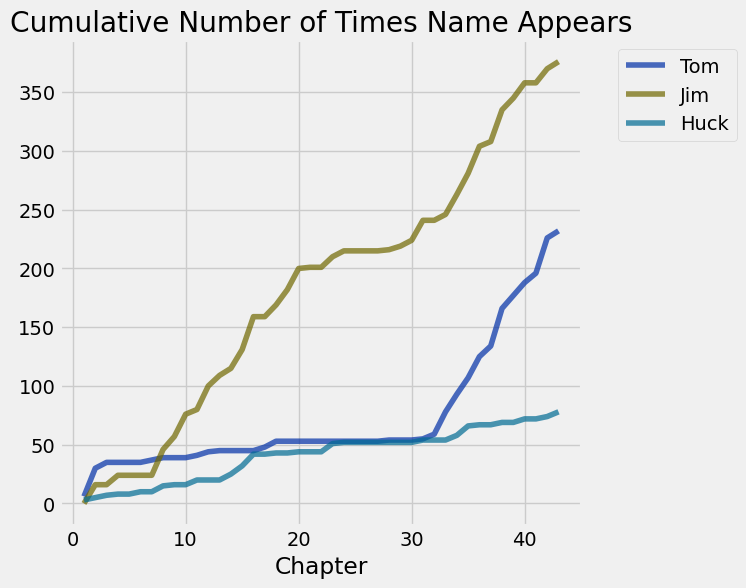

In [11]:
# Plot the cumulative counts:
# how many times in Chapter 1, how many times in Chapters 1 and 2, and so on.

cumulative_columns = []
for col_name in counts.labels:
    # Apply np.cumsum directly to the NumPy array underlying the Table column
    cumulative_columns.append(np.cumsum(counts.column(col_name)))

# Create the 'Chapter' numbers array
chapter_numbers = np.arange(1, 44, 1) # Generates 1, 2, ..., 43

# Create the new Table with cumulative counts and chapter numbers
# We need to explicitly pass the labels and the new cumulative arrays
cum_counts = Table().with_columns(
    counts.labels[0], cumulative_columns[0], # Tom's cumulative counts
    counts.labels[1], cumulative_columns[1], # Jim's cumulative counts
    counts.labels[2], cumulative_columns[2], # Huck's cumulative counts
    'Chapter', chapter_numbers # The new 'Chapter' column
)

print("\nCumulative Counts Table (first 5 rows):")
cum_counts.show(5)

cum_counts.plot(column_for_xticks=3)
plots.title('Cumulative Number of Times Name Appears');

In [12]:
# The chapters of Little Women

Table().with_column('Chapters', little_women_chapters)

Chapters
"ONE PLAYING PILGRIMS ""Christmas won't be Christmas witho ..."
TWO A MERRY CHRISTMAS Jo was the first to wake in the gr ...
"THREE THE LAURENCE BOY ""Jo! Jo! Where are you?"" cried Me ..."
"FOUR BURDENS ""Oh, dear, how hard it does seem to take up ..."
"FIVE BEING NEIGHBORLY ""What in the world are you going t ..."
SIX BETH FINDS THE PALACE BEAUTIFUL The big house did pr ...
"SEVEN AMY'S VALLEY OF HUMILIATION ""That boy is a perfect ..."
"EIGHT JO MEETS APOLLYON ""Girls, where are you going?"" as ..."
"NINE MEG GOES TO VANITY FAIR ""I do think it was the most ..."
"TEN THE P.C. AND P.O. As spring came on, a new set of am ..."


In [13]:
# Counts of names in the chapters of Little Women

names = ['Amy', 'Beth', 'Jo', 'Laurie', 'Meg']
mentions = {name: np.char.count(little_women_chapters, name) for name in names}

counts = Table().with_columns([
        'Amy', mentions['Amy'],
        'Beth', mentions['Beth'],
        'Jo', mentions['Jo'],
        'Laurie', mentions['Laurie'],
        'Meg', mentions['Meg']
    ])


Cumulative Counts Table (first 5 rows):


Amy,Beth,Jo,Laurie,Meg,Chapter
23,26,44,0,26,1
36,38,65,0,46,2
38,40,127,16,82,3
52,58,161,16,99,4
58,72,216,51,112,5


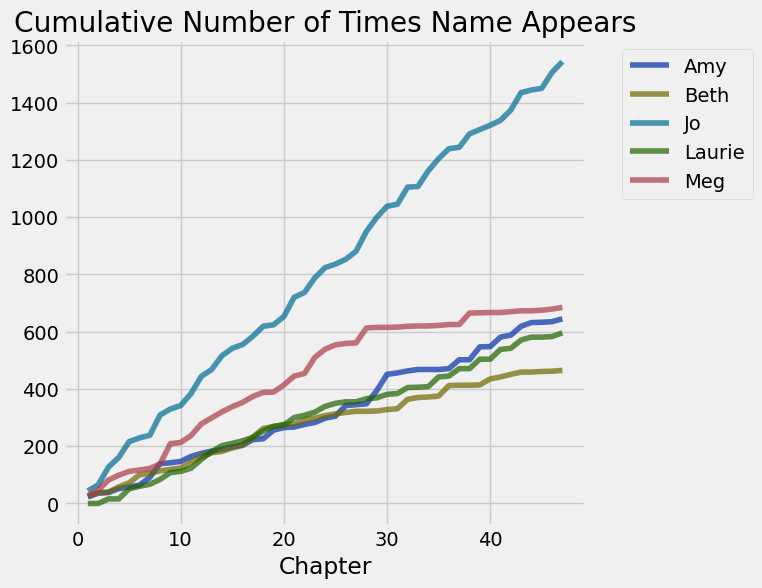

In [14]:
# Plot the cumulative counts

cumulative_columns = []
for col_name in counts.labels:
    # Apply np.cumsum directly to the NumPy array underlying the Table column
    cumulative_columns.append(np.cumsum(counts.column(col_name)))

# Create the 'Chapter' numbers array
chapter_numbers = np.arange(1, 48, 1) # Generates 1, 2, ..., 43

# Create the new Table with cumulative counts and chapter numbers
# We need to explicitly pass the labels and the new cumulative arrays
cum_counts = Table().with_columns(
    counts.labels[0], cumulative_columns[0], # Amy's cumulative counts
    counts.labels[1], cumulative_columns[1], # Beth's cumulative counts
    counts.labels[2], cumulative_columns[2], # Jo's cumulative counts
    counts.labels[3], cumulative_columns[3], # Laurie's cumulative counts
    counts.labels[4], cumulative_columns[4], # Meg's cumulative counts
    'Chapter', chapter_numbers # The new 'Chapter' column
)

print("\nCumulative Counts Table (first 5 rows):")
cum_counts.show(5)

cum_counts.plot(column_for_xticks=5)
plots.title('Cumulative Number of Times Name Appears');

Note: quite cool feature that you can potential tell that laurie and amy got married because their cumulative graphs move together (They are in a sense mostly spoken of as a combined unit)

In [15]:
len('Data 8')

6

In [16]:
len(read_url(huck_finn_url))

588035

In [17]:
# In each chapter, count the number of all characters;
# call this the "length" of the chapter.
# Also count the number of periods.

length_hf = Table().with_columns([
        'Length', [len(s) for s in huck_finn_chapters],
        'Periods', np.char.count(huck_finn_chapters, '.')
    ])
length_lw = Table().with_columns([
        'Length', [len(s) for s in little_women_chapters],
        'Periods', np.char.count(little_women_chapters, '.')
    ])

In [18]:
# The counts for Huckleberry Finn

length_hf

Length,Periods
7026,66
11982,117
8529,72
6799,84
8166,91
14550,125
13218,127
22208,249
8081,71
7036,70


In [19]:
# The counts for Little Women

length_lw

Length,Periods
21759,189
22148,188
20558,231
25526,195
23395,255
14622,140
14431,131
22476,214
33767,337
18508,185


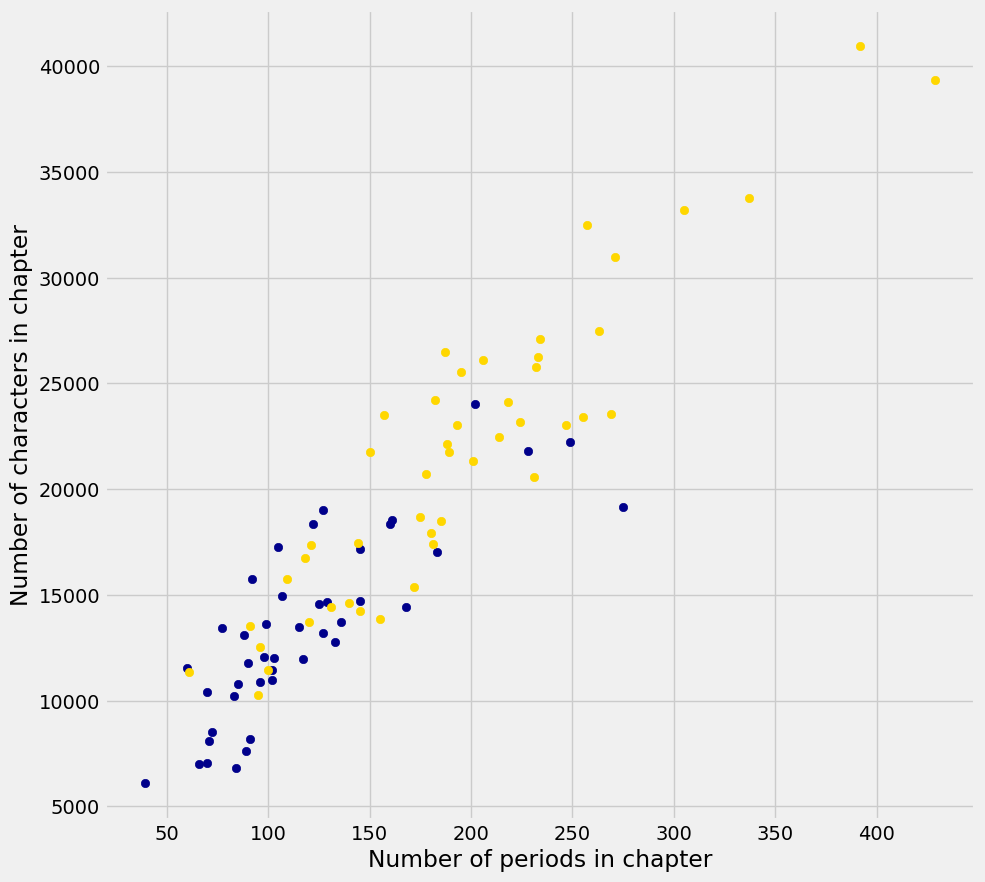

In [20]:
plots.figure(figsize=(10,10))
plots.scatter(length_hf[1], length_hf[0], color='darkblue')
plots.scatter(length_lw[1], length_lw[0], color='gold')
plots.xlabel('Number of periods in chapter')
plots.ylabel('Number of characters in chapter');